In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with = engine,reflect=True)

In [6]:
# View all of the classes that automap found

Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.

recent = session.query(measurement).order_by(measurement.date.desc()).first()
# access date through dictionary
recentdict = recent.__dict__
recentdict['date']


'2017-08-23'

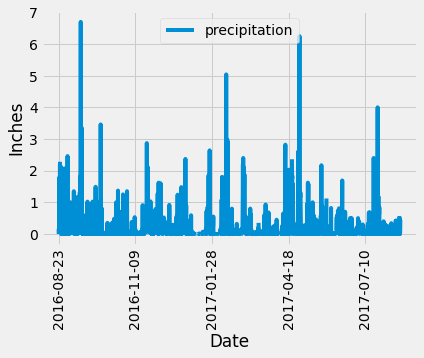

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

one_year = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
year_date = str(one_year)
year_ago_query = session.query(measurement.date,measurement.prcp).\
    filter(measurement.date >= year_date).order_by(measurement.date).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names

year_df = pd.DataFrame(year_ago_query, columns={"Date":"date","Precipitation":"prcp"})
year_df

# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data

year_df.plot(x='Date',y='Precipitation')
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(rotation=90)
plt.legend(["precipitation"])
plt.show()


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data

summary_df = year_df.describe()
summary_df


,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset

total_stations = session.query(station.station).count()
total_stations

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

most_active = session.query(measurement.station,func.count(measurement.station)).\
    group_by(measurement.station).order_by(func.count(measurement.station).desc())

for i in most_active:
    print(i)


('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

most_actives = most_active[0][0]

most_active_temps = session.query(func.min(measurement.tobs), func.max(measurement.tobs),\
                                  func.avg(measurement.tobs)).filter(measurement.station == most_actives).all()

for i in most_active_temps:
    print(i)


(54.0, 85.0, 71.66378066378067)


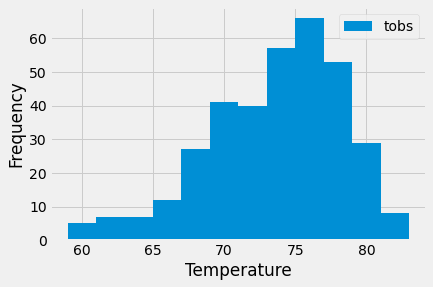

In [28]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_ago_query_recent = session.query(measurement.tobs).\
    filter(measurement.date >= year_date).filter(measurement.station == most_actives).all()

recent_year_df = pd.DataFrame(year_ago_query_recent, columns = {'Temperature':0})
recent_year_df.head()

plt.hist(recent_year_df['Temperature'],bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(["tobs"])
plt.show()

# Close Session

In [16]:
# Close Session
session.close()